___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [2]:
#!pip install tensorflow

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
df.shape

(10000, 11)

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [12]:
for feature in df:
    print(f'{feature:<15}: {df[feature].nunique():<}')


CreditScore    : 460
Geography      : 3
Gender         : 2
Age            : 70
Tenure         : 11
Balance        : 6382
NumOfProducts  : 4
HasCrCard      : 2
IsActiveMember : 2
EstimatedSalary: 9999
Exited         : 2


In [13]:
from locale import normalize
df.Exited.value_counts(normalize=True)
# Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

0   0.796
1   0.204
Name: Exited, dtype: float64

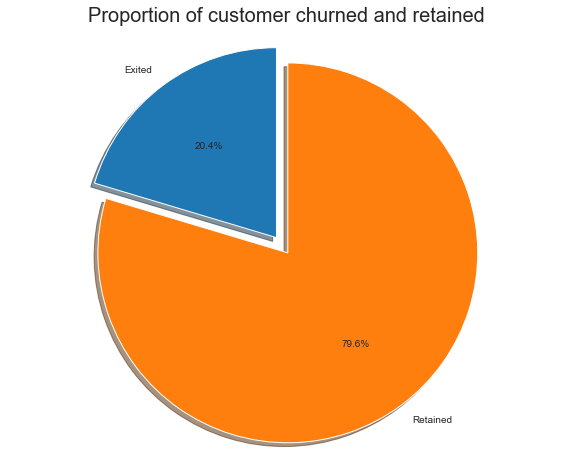

In [14]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()


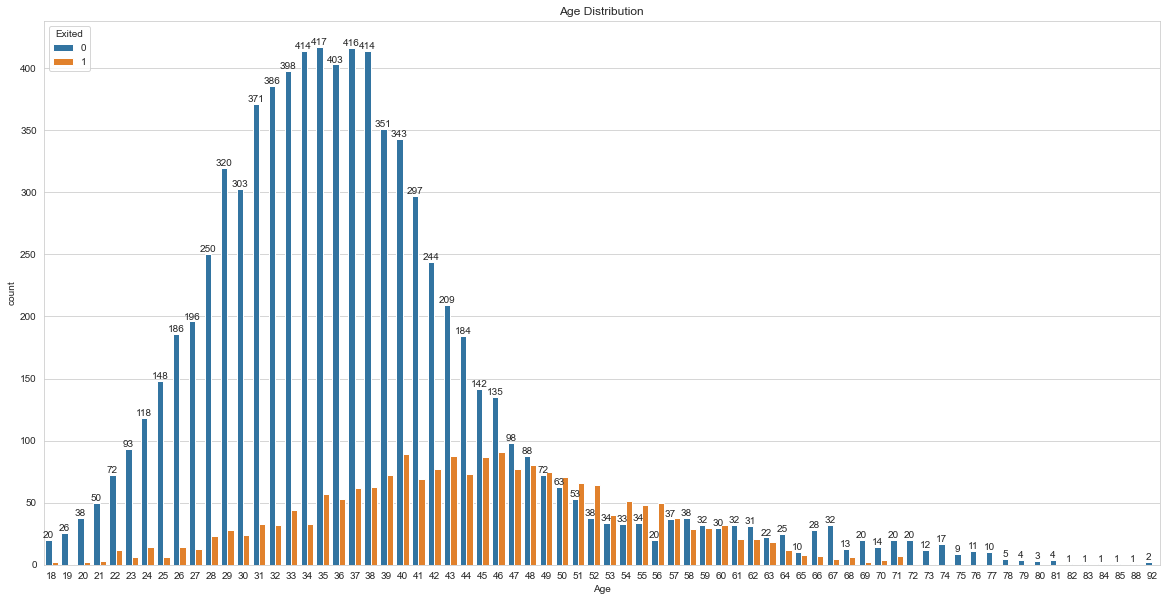

In [15]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Age', hue='Exited', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

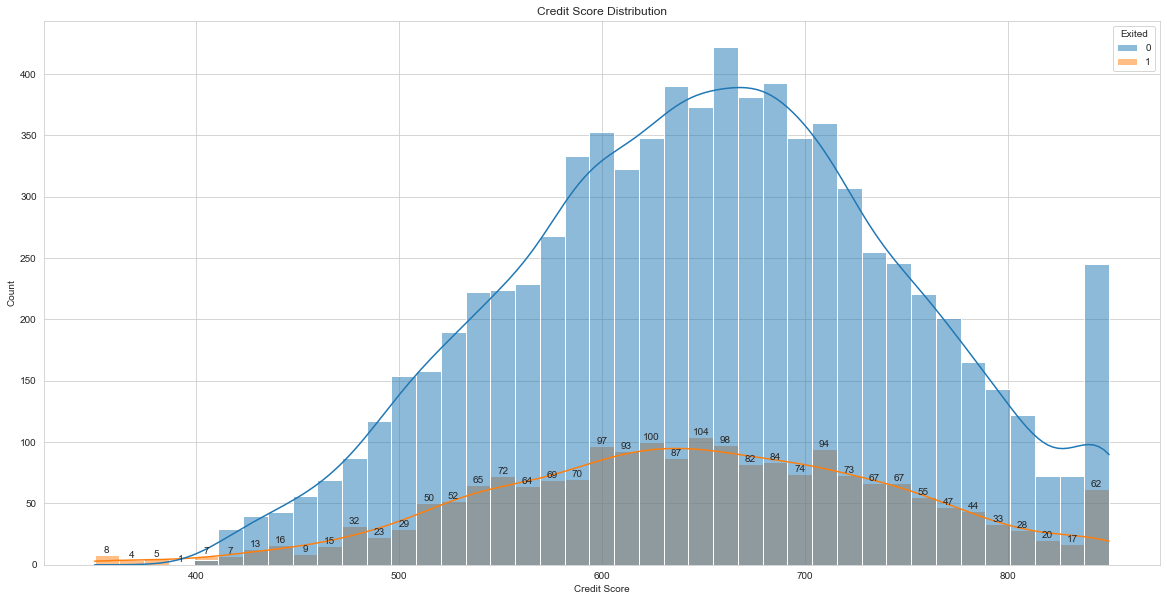

In [17]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(x='CreditScore', kde=True, hue='Exited', data=df)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
ax.bar_label(ax.containers[0])
plt.show()


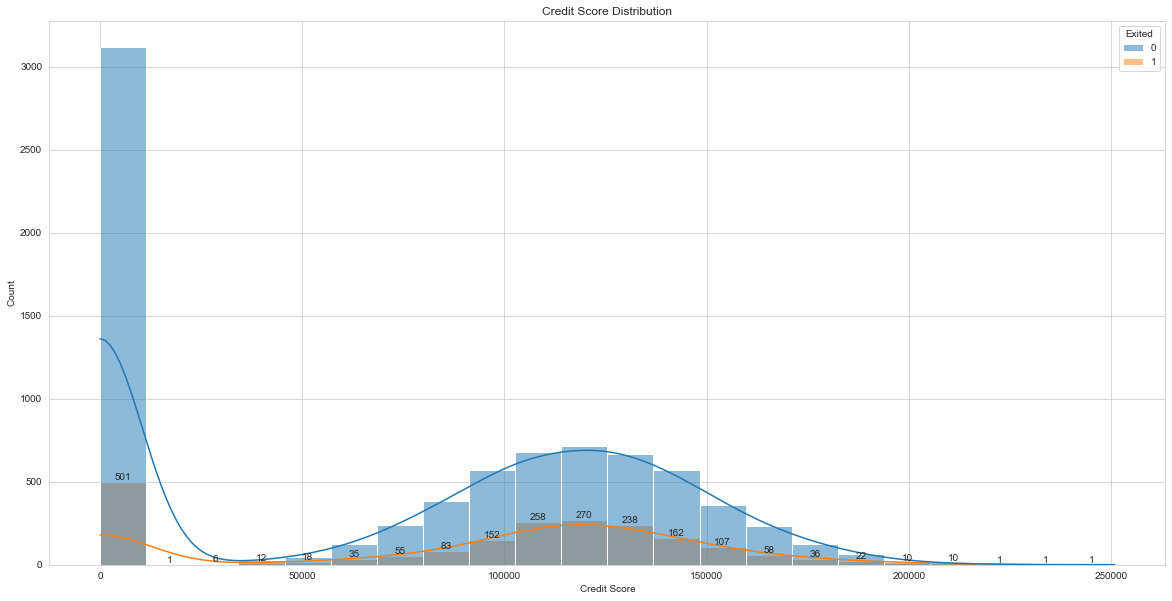

In [18]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(x='Balance', kde=True, hue='Exited', data=df)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
ax.bar_label(ax.containers[0])
plt.show()


In [19]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

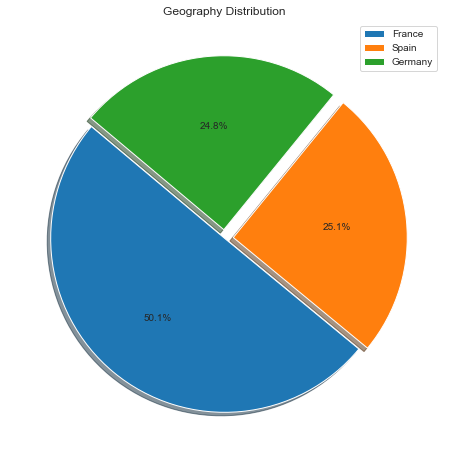

In [21]:
plt.figure(figsize=(8, 8))

explode = [0, 0.05, 0.05]
plt.pie(df['Geography'].value_counts(), explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['France', 'Spain', 'Germany'])
plt.title('Geography Distribution')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

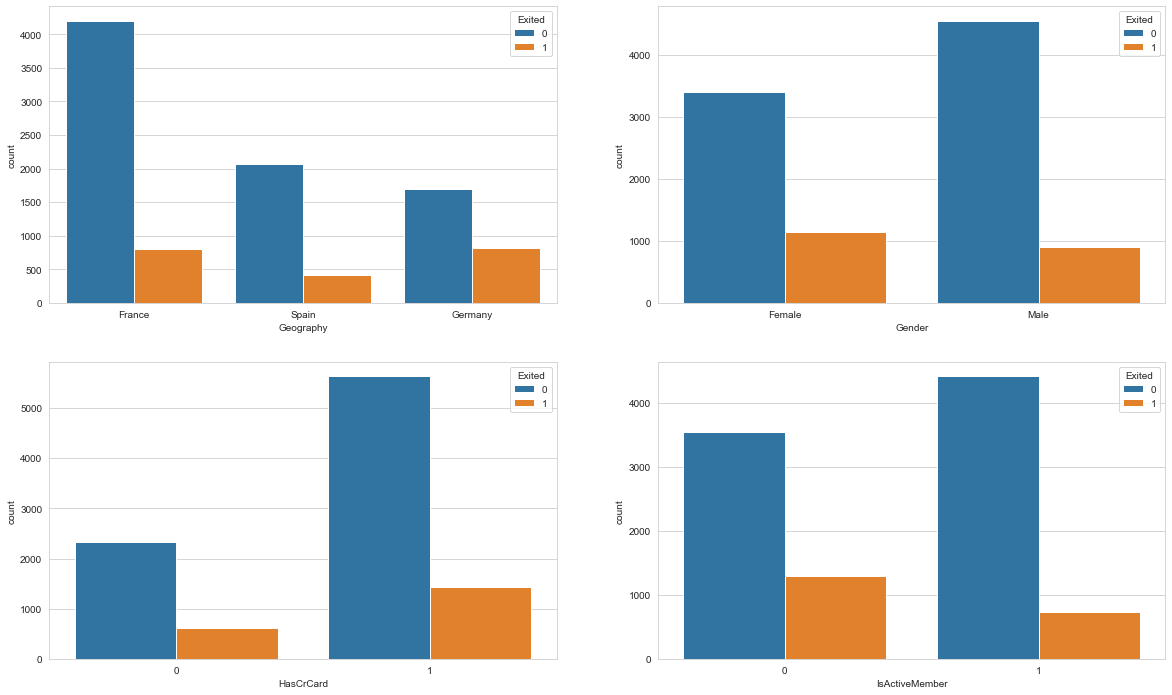

In [22]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [23]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

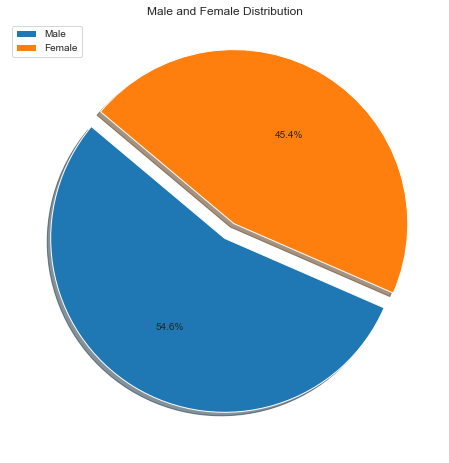

In [24]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Male', 'Female'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()

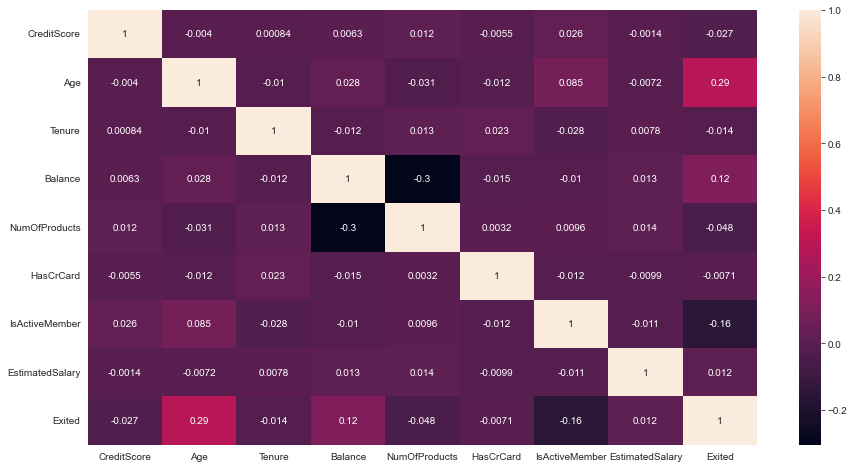

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


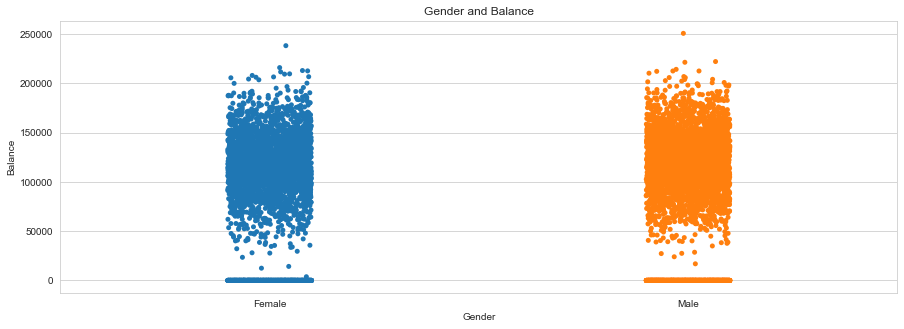

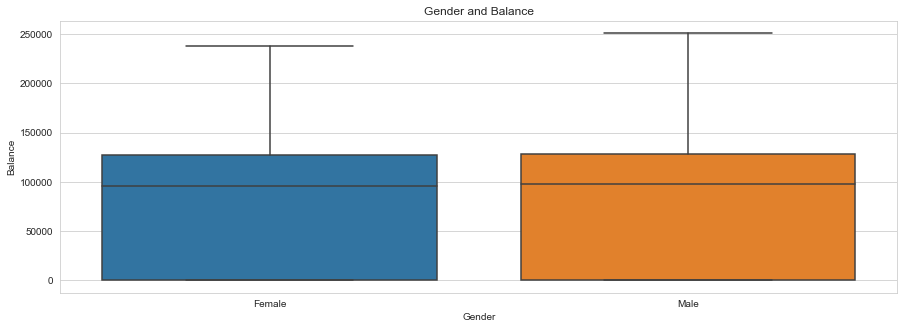

In [26]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='Gender', y='Balance', data=df)
plt.title('Gender and Balance')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Gender', y='Balance', data=df)
plt.title('Gender and Balance')
plt.show()


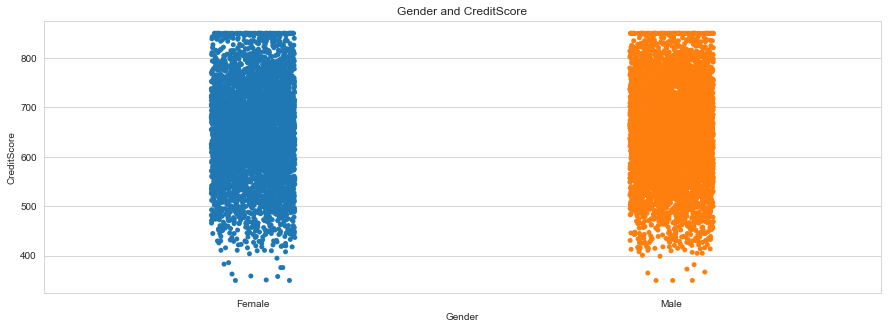

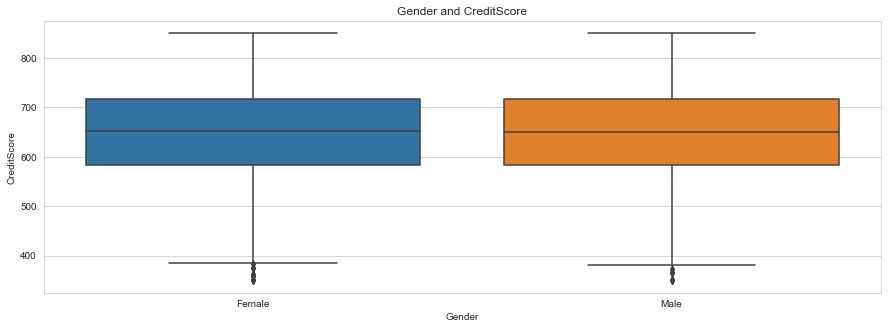

In [27]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='Gender', y='CreditScore', data=df)
plt.title('Gender and CreditScore')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Gender', y='CreditScore', data=df)
plt.title('Gender and CreditScore')
plt.show()


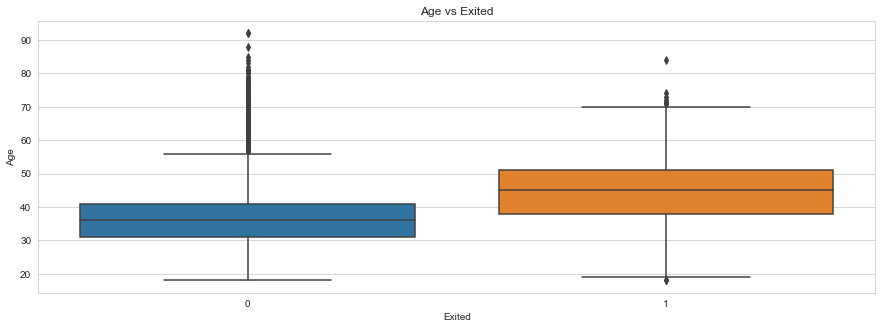

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Exited')
plt.show()
# 0 ---> retained

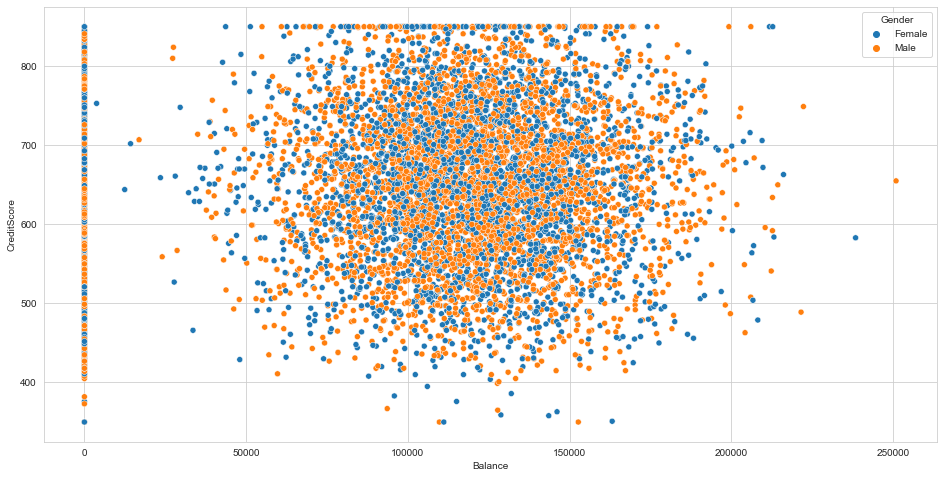

In [29]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x='Balance', y='CreditScore', data=df, hue="Gender")
plt.show()


In [30]:
df.groupby('Gender')['Exited'].value_counts(normalize=True)

Gender  Exited
Female  0        0.749
        1        0.251
Male    0        0.835
        1        0.165
Name: Exited, dtype: float64

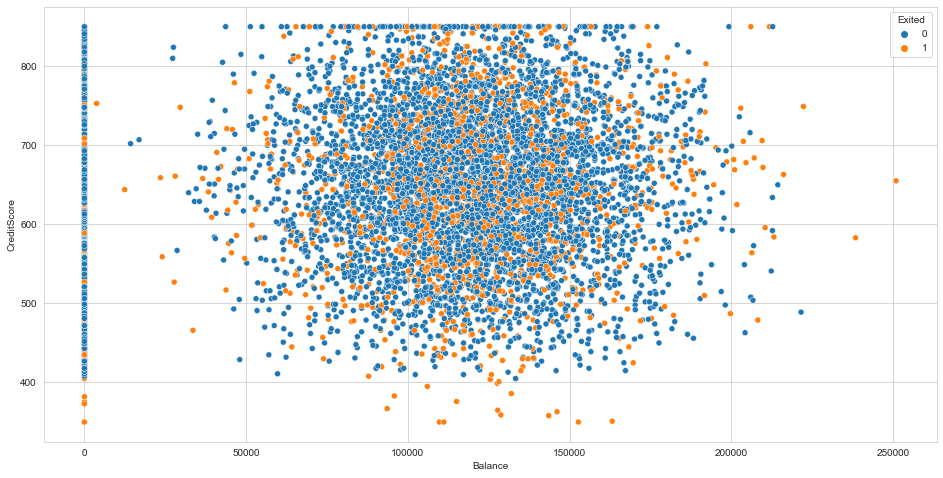

In [31]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x='Balance', y='CreditScore', data=df, hue="Exited")
plt.show()
# 0 --> retained

In [32]:
def mapping_gender(x):
    if x == "Female":
        return 0
    else:
        return 1


In [33]:
df["Gender"] = df.Gender.apply(mapping_gender)

df.Gender.value_counts()


1    5457
0    4543
Name: Gender, dtype: int64

In [34]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [35]:
def mapping_geo(x):
    if x == "France":
        return 0
    elif x == 'Germany':
        return 1
    else:
        return 2

In [36]:
df["Geography"] = df.Geography.apply(mapping_geo)

df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [37]:
df.groupby('Geography')['Exited'].value_counts(normalize=True)
# 0 ---> retained

Geography  Exited
0          0        0.838
           1        0.162
1          0        0.676
           1        0.324
2          0        0.833
           1        0.167
Name: Exited, dtype: float64

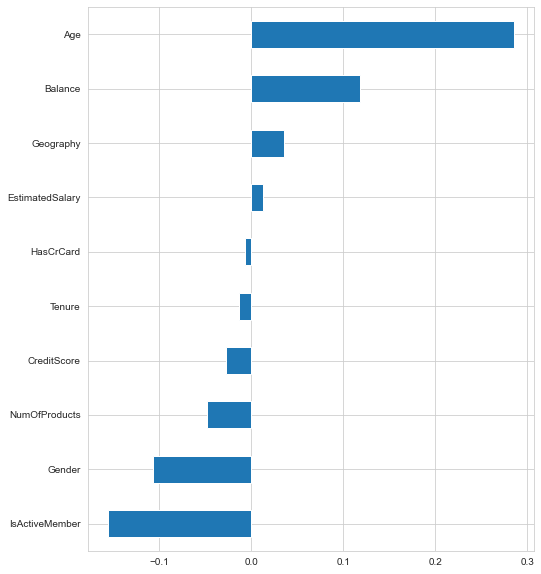

In [38]:
plt.figure(figsize=(8, 10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
plt.show()

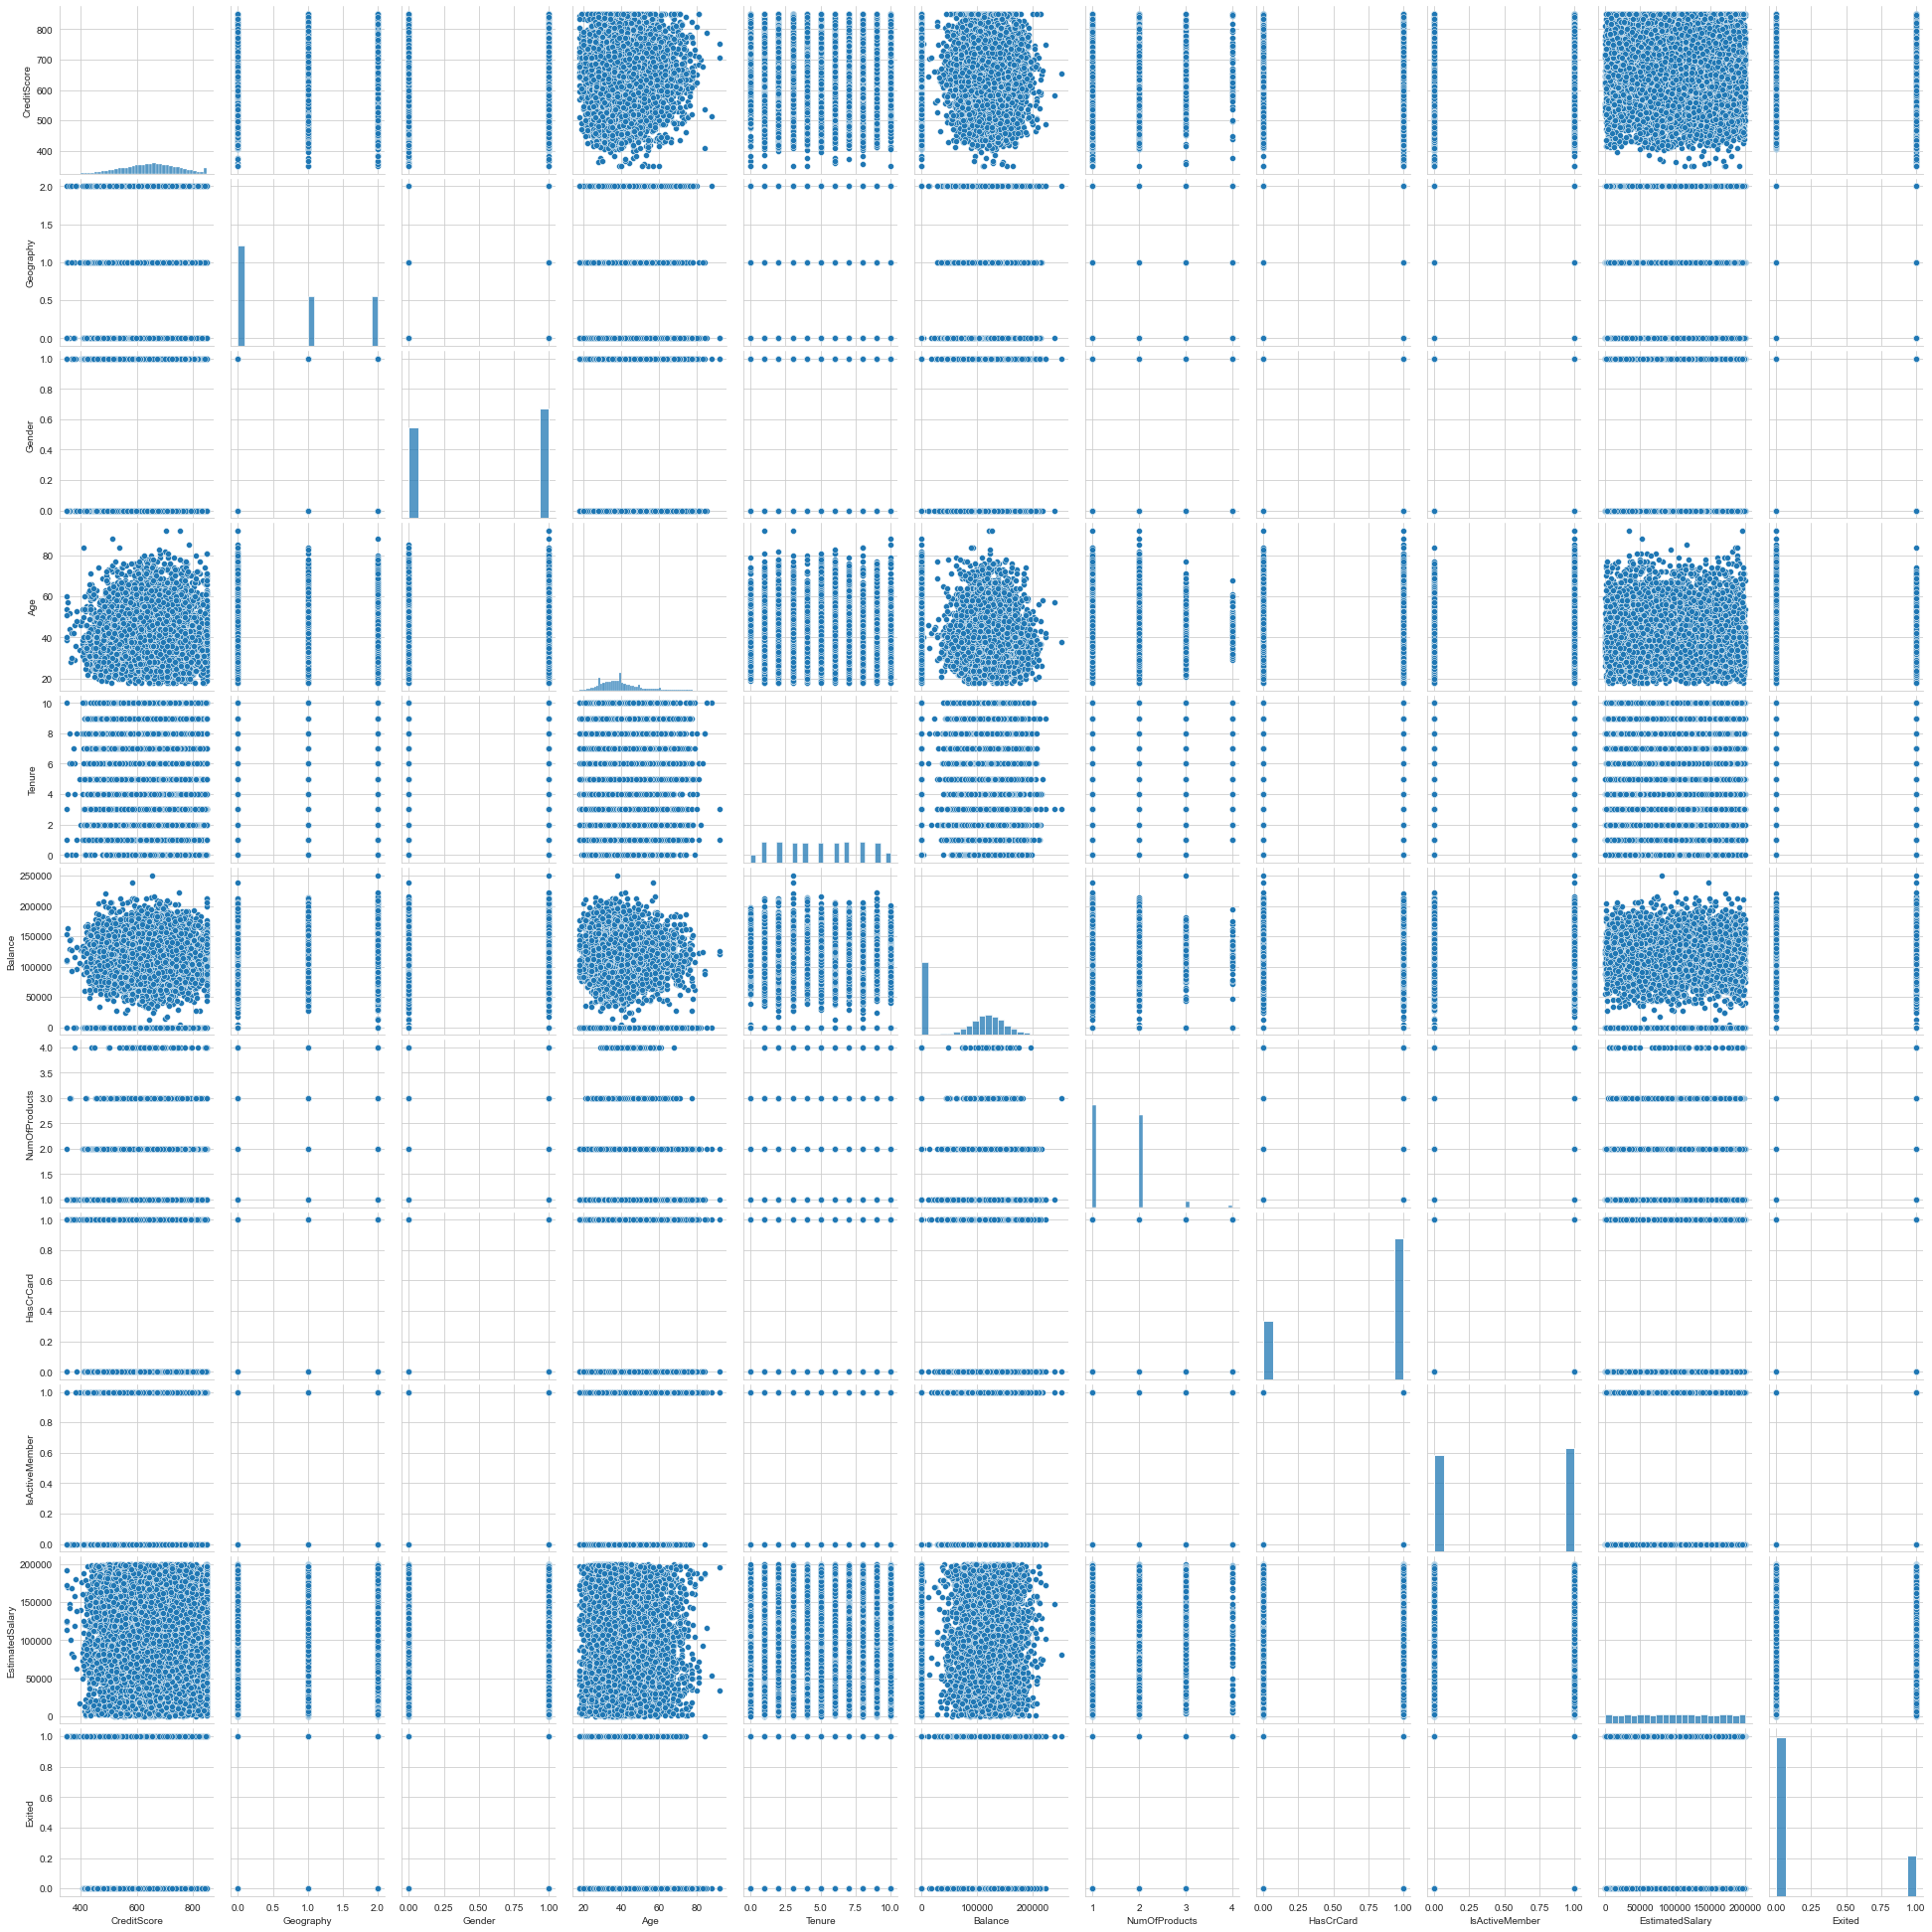

In [39]:
sns.pairplot(df);

In [40]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,0.008,-0.003,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Geography,0.008,1.000,0.005,0.023,0.004,0.069,0.004,-0.009,0.007,-0.001,0.036
Gender,-0.003,0.005,1.000,-0.028,0.015,0.012,-0.022,0.006,0.023,-0.008,-0.107
Age,-0.004,0.023,-0.028,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,0.004,0.015,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
...,...,...,...,...,...,...,...,...,...,...,...
NumOfProducts,0.012,0.004,-0.022,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.009,0.006,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.007,0.023,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.001,-0.008,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


# Preprocessing of Data
- Train | Test Split, Scalling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [42]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [43]:
seed = 42


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed)


In [45]:
scaler = MinMaxScaler()


In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [48]:
import sklearn

In [49]:
X_train.shape


(9000, 10)

In [50]:
X_test.shape


(1000, 10)

In [51]:
tf.random.set_seed(seed)

model = Sequential()

# input sayisinin () yüzde 50 kadar fazlasi --> 36
model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
# classification oldugu icin bu son layer a activation yazdik
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])
# regression da metrics mae olabilir veya baska


In [52]:
model.fit(x=X_train, y=y_train, validation_split=0.1,
          batch_size=128, epochs=500, verbose=1)


Epoch 1/500
64/64 [==============================] - 1s 6ms/step - loss: 0.5521 - accuracy: 0.7905 - val_loss: 0.5009 - val_accuracy: 0.7989
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.7960 - val_loss: 0.4820 - val_accuracy: 0.7989
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7960 - val_loss: 0.4651 - val_accuracy: 0.7989
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7962 - val_loss: 0.4510 - val_accuracy: 0.8000
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7999 - val_loss: 0.4385 - val_accuracy: 0.8100
Epoch 6/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8063 - val_loss: 0.4277 - val_accuracy: 0.8167
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8100 - val_loss: 0.4189 - val_accuracy: 0.8200
Epoch 8/500
6

In [53]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()


,loss,accuracy,val_loss,val_accuracy
495,0.310,0.872,0.309,0.881
496,0.310,0.869,0.318,0.886
497,0.311,0.869,0.310,0.882
498,0.310,0.870,0.307,0.882
499,0.310,0.871,0.309,0.884


<AxesSubplot:>

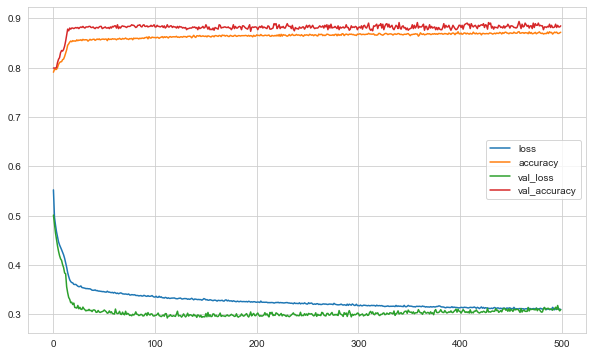

In [55]:
loss_df.plot()


In [56]:
model.evaluate(X_test, y_test, verbose=1)


32/32 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8600


[0.35931774973869324, 0.8600000143051147]

In [57]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("loss : ", loss)
print("accuracy : ", accuracy)


32/32 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8600
loss :  0.35931774973869324
accuracy :  0.8600000143051147


In [58]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[761  35]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.74      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [59]:
neg, pos = np.bincount(df['Exited'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 10000
    Positive: 2037 (20.37% of total)



In [60]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [61]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.63
Weight for class 1: 2.45


In [62]:
tf.random.set_seed(seed)

model_class_weight = Sequential()

# input sayisinin () yüzde 50 kadar fazlasi --> 36
model_class_weight.add(
    Dense(30, activation="relu", input_dim=X_train.shape[1]))
model_class_weight.add(Dense(12, activation="relu"))
model_class_weight.add(Dense(8, activation="relu"))
# classification oldugu icin bu son layer a activation yazdik
model_class_weight.add(Dense(1, activation="sigmoid"))

model_class_weight.compile(optimizer="adam", loss="binary_crossentropy",
                           metrics=["accuracy"])
# regression da metrics mae olabilir veya baska


In [63]:
model_class_weight.fit(x=X_train, y=y_train, validation_split=0.1,
                       batch_size=128, epochs=500, verbose=1, class_weight=class_weight)


Epoch 1/500
64/64 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.7558 - val_loss: 0.6674 - val_accuracy: 0.6478
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6423 - val_loss: 0.6535 - val_accuracy: 0.6333
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6363 - val_loss: 0.6106 - val_accuracy: 0.6622
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6507 - val_loss: 0.5853 - val_accuracy: 0.6922
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6643 - val_loss: 0.5604 - val_accuracy: 0.7089
Epoch 6/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.6902 - val_loss: 0.5116 - val_accuracy: 0.7600
Epoch 7/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.6983 - val_loss: 0.5641 - val_accuracy: 0.7044
Epoch 8/500
6

In [64]:
model_class_weight.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                330       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [65]:
loss_df = pd.DataFrame(model_class_weight.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
495,0.391,0.824,0.404,0.819
496,0.391,0.820,0.500,0.752
497,0.395,0.818,0.425,0.804
498,0.392,0.818,0.483,0.770
499,0.391,0.824,0.487,0.759


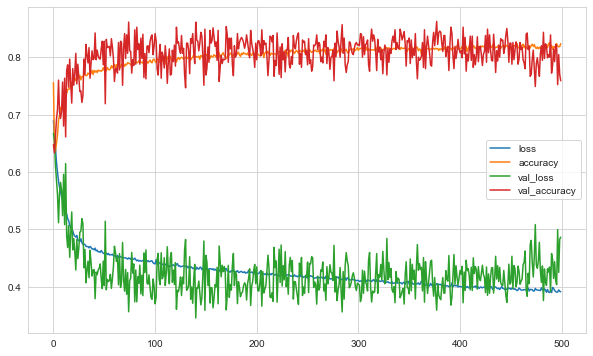

In [66]:
loss_df.plot();

In [67]:
model_class_weight.evaluate(X_test, y_test, verbose=1)


32/32 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7190


[0.5714913010597229, 0.718999981880188]

In [68]:
loss, accuracy = model_class_weight.evaluate(X_test, y_test, verbose=1)
print("loss : ", loss)
print("accuracy : ", accuracy)


32/32 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7190
loss :  0.5714913010597229
accuracy :  0.718999981880188


In [69]:
y_pred = model_class_weight.predict(X_test) > 0.3

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[437 359]
 [ 29 175]]
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       796
           1       0.33      0.86      0.47       204

    accuracy                           0.61      1000
   macro avg       0.63      0.70      0.58      1000
weighted avg       0.81      0.61      0.65      1000



In [70]:
train_predictions_weighted = model_class_weight.predict(
    X_train, batch_size=128)
test_predictions_weighted = model_class_weight.predict(
    X_test, batch_size=128)


8/8 [==============================] - 0s 1ms/step


In [71]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5, 5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print(
      'Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))


loss :  0.5714911818504333
accuracy :  0.718999981880188

Legitimate Transactions Detected (True Negatives):  466
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  151
Fraudulent Transactions Detected (True Positives):  383
Total Fraudulent Transactions:  534


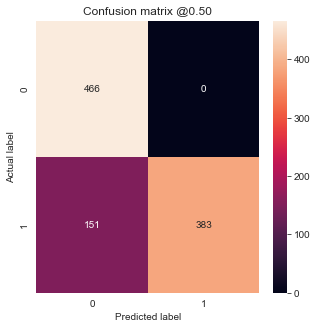

In [72]:
weighted_results = model_class_weight.evaluate(X_test, y_test,
                                           batch_size=128, verbose=0)
for name, value in zip(model_class_weight.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_pred, test_predictions_weighted)


32/32 [==============================] - 0s 1ms/step


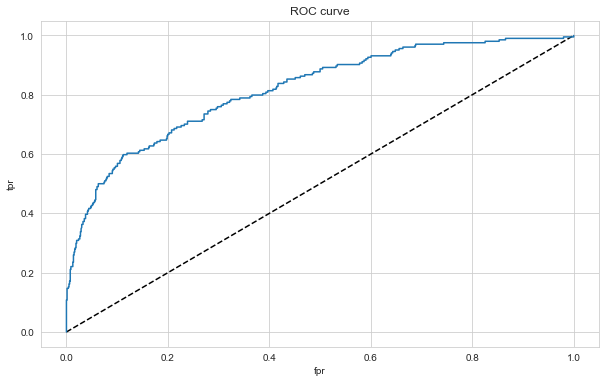

In [73]:
y_pred_proba = model_class_weight.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [74]:
from tensorflow.keras.optimizers import Adam


In [75]:
tf.random.set_seed(seed)

model = Sequential()

# input sayisinin () yüzde 50 kadar fazlasi --> 36
model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
# classification oldugu icin bu son layer a activation yazdik
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)  # default 0,001 ---> 0.003 te denenebilir...
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [76]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=500, verbose=1,
          class_weight=class_weight)


Epoch 1/500
64/64 [==============================] - 1s 4ms/step - loss: 0.6470 - accuracy: 0.6221 - val_loss: 0.6370 - val_accuracy: 0.6156
Epoch 2/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6701 - val_loss: 0.5219 - val_accuracy: 0.7711
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7198 - val_loss: 0.4923 - val_accuracy: 0.7811
Epoch 4/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7364 - val_loss: 0.5096 - val_accuracy: 0.7633
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7284 - val_loss: 0.4543 - val_accuracy: 0.8089
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7472 - val_loss: 0.4628 - val_accuracy: 0.7922
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7423 - val_loss: 0.4123 - val_accuracy: 0.8100
Epoch 8/500
6

<AxesSubplot:>

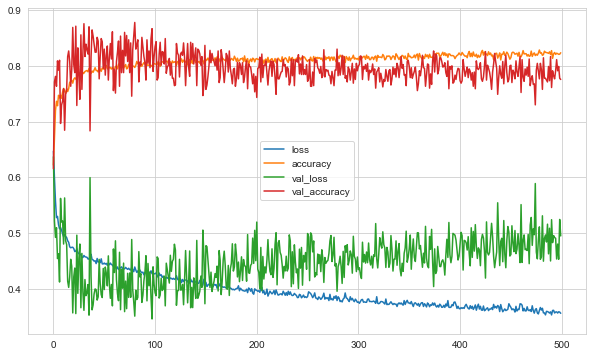

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("loss : ", loss)
print("accuracy : ", accuracy)


32/32 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7400
loss :  0.6121712327003479
accuracy :  0.7400000095367432


In [79]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[590 206]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       796
           1       0.42      0.74      0.54       204

    accuracy                           0.74      1000
   macro avg       0.67      0.74      0.68      1000
weighted avg       0.82      0.74      0.76      1000



### Add Dropout Layer

In [85]:
from tensorflow.keras.layers import Dropout


In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
# 0,5 ne kadar oranla süzgec gecirecek nöronlari, bu katmanin random olarak %50 sini gecir %50 sini bloke et
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [87]:
model.fit(x=X_train, y=y_train, validation_split=0.1,
          batch_size=128, epochs=500, verbose=1)


Epoch 1/500
64/64 [==============================] - 1s 6ms/step - loss: 0.6418 - accuracy: 0.7169 - val_loss: 0.5581 - val_accuracy: 0.7989
Epoch 2/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7891 - val_loss: 0.5251 - val_accuracy: 0.7989
Epoch 3/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7937 - val_loss: 0.5041 - val_accuracy: 0.7989
Epoch 4/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.7952 - val_loss: 0.4912 - val_accuracy: 0.7989
Epoch 5/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7960 - val_loss: 0.4871 - val_accuracy: 0.7989
Epoch 6/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7960 - val_loss: 0.4805 - val_accuracy: 0.7989
Epoch 7/500
64/64 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7960 - val_loss: 0.4848 - val_accuracy: 0.7989
Epoch 8/500
6

Epoch 59/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8238 - val_loss: 0.3422 - val_accuracy: 0.8633
Epoch 60/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8241 - val_loss: 0.3421 - val_accuracy: 0.8656
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8219 - val_loss: 0.3434 - val_accuracy: 0.8544
Epoch 62/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8251 - val_loss: 0.3451 - val_accuracy: 0.8644
Epoch 63/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8240 - val_loss: 0.3462 - val_accuracy: 0.8589
Epoch 64/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8223 - val_loss: 0.3417 - val_accuracy: 0.8656
Epoch 65/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8278 - val_loss: 0.3422 - val_accuracy: 0.8656
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8305 - val_loss: 0.3289 - val_accuracy: 0.8722
Epoch 117/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8268 - val_loss: 0.3278 - val_accuracy: 0.8711
Epoch 118/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8269 - val_loss: 0.3262 - val_accuracy: 0.8700
Epoch 119/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8294 - val_loss: 0.3281 - val_accuracy: 0.8700
Epoch 120/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8325 - val_loss: 0.3309 - val_accuracy: 0.8689
Epoch 121/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8322 - val_loss: 0.3255 - val_accuracy: 0.8678
Epoch 122/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8325 - val_loss: 0.3236 - val_accuracy: 0.8733
Epoch 123/500

64/64 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8309 - val_loss: 0.3299 - val_accuracy: 0.8678
Epoch 174/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.8342 - val_loss: 0.3218 - val_accuracy: 0.8711
Epoch 175/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3995 - accuracy: 0.8325 - val_loss: 0.3239 - val_accuracy: 0.8689
Epoch 176/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8326 - val_loss: 0.3327 - val_accuracy: 0.8689
Epoch 177/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.8316 - val_loss: 0.3317 - val_accuracy: 0.8689
Epoch 178/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8322 - val_loss: 0.3222 - val_accuracy: 0.8733
Epoch 179/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8360 - val_loss: 0.3197 - val_accuracy: 0.8744
Epoch 180/500

64/64 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8280 - val_loss: 0.3341 - val_accuracy: 0.8700
Epoch 231/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8286 - val_loss: 0.3252 - val_accuracy: 0.8700
Epoch 232/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8312 - val_loss: 0.3321 - val_accuracy: 0.8667
Epoch 233/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8316 - val_loss: 0.3256 - val_accuracy: 0.8689
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8299 - val_loss: 0.3273 - val_accuracy: 0.8744
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8305 - val_loss: 0.3259 - val_accuracy: 0.8689
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8346 - val_loss: 0.3272 - val_accuracy: 0.8711
Epoch 237/500

64/64 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8311 - val_loss: 0.3310 - val_accuracy: 0.8689
Epoch 288/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8311 - val_loss: 0.3305 - val_accuracy: 0.8733
Epoch 289/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8315 - val_loss: 0.3238 - val_accuracy: 0.8722
Epoch 290/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8300 - val_loss: 0.3339 - val_accuracy: 0.8656
Epoch 291/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8305 - val_loss: 0.3319 - val_accuracy: 0.8678
Epoch 292/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8323 - val_loss: 0.3293 - val_accuracy: 0.8722
Epoch 293/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8326 - val_loss: 0.3263 - val_accuracy: 0.8744
Epoch 294/500

64/64 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8352 - val_loss: 0.3300 - val_accuracy: 0.8722
Epoch 345/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8342 - val_loss: 0.3272 - val_accuracy: 0.8756
Epoch 346/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8363 - val_loss: 0.3267 - val_accuracy: 0.8733
Epoch 347/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8327 - val_loss: 0.3284 - val_accuracy: 0.8711
Epoch 348/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8346 - val_loss: 0.3311 - val_accuracy: 0.8733
Epoch 349/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8286 - val_loss: 0.3305 - val_accuracy: 0.8656
Epoch 350/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8338 - val_loss: 0.3280 - val_accuracy: 0.8733
Epoch 351/500

64/64 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8347 - val_loss: 0.3303 - val_accuracy: 0.8711
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8342 - val_loss: 0.3299 - val_accuracy: 0.8722
Epoch 403/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8337 - val_loss: 0.3301 - val_accuracy: 0.8722
Epoch 404/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8319 - val_loss: 0.3318 - val_accuracy: 0.8722
Epoch 405/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8332 - val_loss: 0.3351 - val_accuracy: 0.8689
Epoch 406/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8298 - val_loss: 0.3349 - val_accuracy: 0.8722
Epoch 407/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8337 - val_loss: 0.3323 - val_accuracy: 0.8767
Epoch 408/500

64/64 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.8320 - val_loss: 0.3280 - val_accuracy: 0.8778
Epoch 459/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8335 - val_loss: 0.3356 - val_accuracy: 0.8711
Epoch 460/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8322 - val_loss: 0.3291 - val_accuracy: 0.8767
Epoch 461/500
64/64 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8322 - val_loss: 0.3336 - val_accuracy: 0.8689
Epoch 462/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8343 - val_loss: 0.3320 - val_accuracy: 0.8689
Epoch 463/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8305 - val_loss: 0.3329 - val_accuracy: 0.8767
Epoch 464/500
64/64 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8338 - val_loss: 0.3325 - val_accuracy: 0.8722
Epoch 465/500

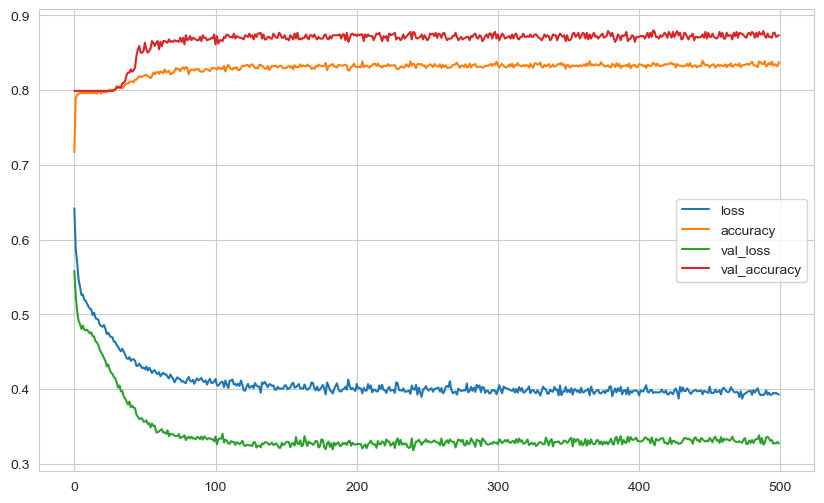

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();


In [89]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("loss : ", loss)
print("accuracy : ", accuracy)


32/32 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8500
loss :  0.36129164695739746
accuracy :  0.8500000238418579


In [90]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[785  11]
 [139  65]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       796
           1       0.86      0.32      0.46       204

    accuracy                           0.85      1000
   macro avg       0.85      0.65      0.69      1000
weighted avg       0.85      0.85      0.82      1000



Cross Validation

In [87]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [92]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=30, activation='relu'))
    classifier.add(Dense(units=12, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(
        optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [ ]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, batch_size=128, epochs=500, verbose=1)

scores = cross_validate(estimator=classifier_model, X=X_train, y=y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

df_scores


Epoch 1/500
64/64 [==============================] - 1s 2ms/step - loss: 0.5847 - accuracy: 0.7756
Epoch 2/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7968
Epoch 3/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7968
Epoch 4/500
64/64 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7968
Epoch 5/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7973
Epoch 6/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7998
Epoch 7/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8064
Epoch 8/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8116
Epoch 9/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8131
Epoch 10/500
64/64 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8146
Epoch 11/

64/64 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8617
Epoch 84/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8593
Epoch 85/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8591
Epoch 86/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8612
Epoch 87/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8638
Epoch 88/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8607
Epoch 89/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8627
Epoch 90/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8610
Epoch 91/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8625
Epoch 92/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8609
Epoch 93/500


64/64 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8670
Epoch 165/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8664
Epoch 166/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8651
Epoch 167/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8647
Epoch 168/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8643
Epoch 169/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8659
Epoch 170/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8663
Epoch 171/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8648
Epoch 172/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8649
Epoch 173/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8657
Epoc

64/64 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8685
Epoch 246/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8691
Epoch 247/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8683
Epoch 248/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8667
Epoch 249/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8674
Epoch 250/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8685
Epoch 251/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8677
Epoch 252/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8667
Epoch 253/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8684
Epoch 254/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8674
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8684
Epoch 327/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8685
Epoch 328/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8690
Epoch 329/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8688
Epoch 330/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8689
Epoch 331/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8669
Epoch 332/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8678
Epoch 333/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8668
Epoch 334/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8691
Epoch 335/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8691
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8698
Epoch 408/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8710
Epoch 409/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8683
Epoch 410/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8717
Epoch 411/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8714
Epoch 412/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8700
Epoch 413/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8711
Epoch 414/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8712
Epoch 415/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8705
Epoch 416/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8701
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8725
Epoch 489/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8710
Epoch 490/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8723
Epoch 491/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8726
Epoch 492/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8725
Epoch 493/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8733
Epoch 494/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8720
Epoch 495/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8710
Epoch 496/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8711
Epoch 497/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8731
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8612
Epoch 70/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8623
Epoch 71/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8632
Epoch 72/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8622
Epoch 73/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8620
Epoch 74/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8626
Epoch 75/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8626
Epoch 76/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8626
Epoch 77/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8630
Epoch 78/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8640
Epoch 79/500


64/64 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8677
Epoch 151/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8674
Epoch 152/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8669
Epoch 153/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8670
Epoch 154/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8693
Epoch 155/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8693
Epoch 156/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8693
Epoch 157/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8669
Epoch 158/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8683
Epoch 159/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8702
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8670
Epoch 232/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8688
Epoch 233/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8700
Epoch 234/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8672
Epoch 235/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8717
Epoch 236/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8675
Epoch 237/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8689
Epoch 238/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8689
Epoch 239/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8694
Epoch 240/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8689
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8733
Epoch 313/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8736
Epoch 314/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8731
Epoch 315/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8721
Epoch 316/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8719
Epoch 317/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8711
Epoch 318/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8717
Epoch 319/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8702
Epoch 320/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8691
Epoch 321/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8720
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8728
Epoch 394/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8733
Epoch 395/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8744
Epoch 396/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8749
Epoch 397/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8740
Epoch 398/500
64/64 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8742
Epoch 399/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8731
Epoch 400/500
64/64 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8741
Epoch 401/500
64/64 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8758
Epoch 402/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8728
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8740
Epoch 475/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.8740
Epoch 476/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8752
Epoch 477/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8773
Epoch 478/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8770
Epoch 479/500
64/64 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8765
Epoch 480/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8741
Epoch 481/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8749
Epoch 482/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8747
Epoch 483/500
64/64 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8742
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8596
Epoch 56/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8588
Epoch 57/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8607
Epoch 58/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8585
Epoch 59/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8611
Epoch 60/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8604
Epoch 61/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8615
Epoch 62/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8595
Epoch 63/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8605
Epoch 64/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8612
Epoch 65/500


64/64 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8651
Epoch 137/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8653
Epoch 138/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8662
Epoch 139/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8641
Epoch 140/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8680
Epoch 141/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8667
Epoch 142/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8643
Epoch 143/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8672
Epoch 144/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8668
Epoch 145/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8672
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8670
Epoch 218/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8665
Epoch 219/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8665
Epoch 220/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8677
Epoch 221/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8681
Epoch 222/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8664
Epoch 223/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8685
Epoch 224/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8668
Epoch 225/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8695
Epoch 226/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8700
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8695
Epoch 299/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8685
Epoch 300/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8711
Epoch 301/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8690
Epoch 302/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8683
Epoch 303/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8702
Epoch 304/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8698
Epoch 305/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8670
Epoch 306/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8684
Epoch 307/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8670
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8704
Epoch 380/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8706
Epoch 381/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8706
Epoch 382/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8710
Epoch 383/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8716
Epoch 384/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8695
Epoch 385/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8689
Epoch 386/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8716
Epoch 387/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8674
Epoch 388/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8695
Epoc

64/64 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8727
Epoch 461/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8730
Epoch 462/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8732
Epoch 463/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8705
Epoch 464/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8726
Epoch 465/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8712
Epoch 466/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8725
Epoch 467/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8721
Epoch 468/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8716
Epoch 469/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8715
Epoc

64/64 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8577
Epoch 42/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8575
Epoch 43/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8579
Epoch 44/500
64/64 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8572
Epoch 45/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8604
Epoch 46/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8569
Epoch 47/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8596
Epoch 48/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8586
Epoch 49/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8569
Epoch 50/500
64/64 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8584
Epoch 51/500


In [ ]:
df_scores_summary = pd.DataFrame({"score_mean": df_scores.mean().values, "score_std": df_scores.std().values},
                                 index=["acc", "pre", "rec", "f1"])

df_scores_summary


### Add Early Stop

#### Monitor the "val_loss" as metric

In [84]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=25, restore_best_weights=True)


In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=500, verbose=1,
          callbacks=[early_stop])


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Monitor the "val_recall" as metric

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience=10, restore_best_weights=True)


In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=500, verbose=1,
          callbacks=[early_stop])


Early stopping conditioned on metric `val_recall` which is not available!!!! Available metrics are: loss,accuracy,val_loss,val_accuracy

With "val_accuracy" as metric

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])


In [83]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max",
                           verbose=1, patience=10, restore_best_weights=True)

NameError: name 'EarlyStopping' is not defined

In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=500, verbose=1,
          callbacks=[early_stop])


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## GridSearchCV

In [80]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam


In [81]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units=30, activation='relu'))
    classifier.add(Dense(units=12, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


In [85]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=15, restore_best_weights=True)


In [88]:
classifier_model = KerasClassifier(
    build_fn=build_classifier, validation_split=0.1, epochs=100)

parameters = {'batch_size': [128, 180],
              'optimizer': [Adam, Adadelta, Nadam],
              'learn_rate': [0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier_model,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks=[early_stop])


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Epoch 1/100
64/64 [==============================] - 1s 4ms/step - loss: 0.5390 - accuracy: 0.7878 - val_loss: 0.4932 - val_accuracy: 0.7989
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7960 - val_loss: 0.4633 - val_accuracy: 0.7989
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7970 - val_loss: 0.4341 - val_accuracy: 0.8256
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8151 - val_loss: 0.3918 - val_accuracy: 0.8444
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8265 - val_loss: 0.3669 - val_accuracy: 0.8533
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8338 - val_loss: 0.3454 - val_accuracy: 0.8667
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy:

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000024673D08DC0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 180], 'learn_rate': [0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [89]:
grid_model.best_score_


0.8588888888888888

In [90]:
grid_model.best_params_


{'batch_size': 128,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [91]:
grid_result = pd.DataFrame(grid_model.cv_results_)[
    ["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result


,mean_test_score,std_test_score,rank_test_score,params
0,0.859,0.013,1,"{'batch_size': 128, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>}"
9,0.858,0.011,2,"{'batch_size': 180, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>}"
6,0.858,0.012,3,"{'batch_size': 180, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>}"
8,0.858,0.012,3,"{'batch_size': 180, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>}"
2,0.857,0.013,5,"{'batch_size': 128, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>}"
...,...,...,...,...
3,0.855,0.015,8,"{'batch_size': 128, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>}"
4,0.796,0.010,9,"{'batch_size': 128, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>}"
10,0.796,0.010,9,"{'batch_size': 180, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>}"
1,0.795,0.012,11,"{'batch_size': 128, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>}"


In [92]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[761  35]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       796
           1       0.73      0.47      0.57       204

    accuracy                           0.86      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 1ms/step


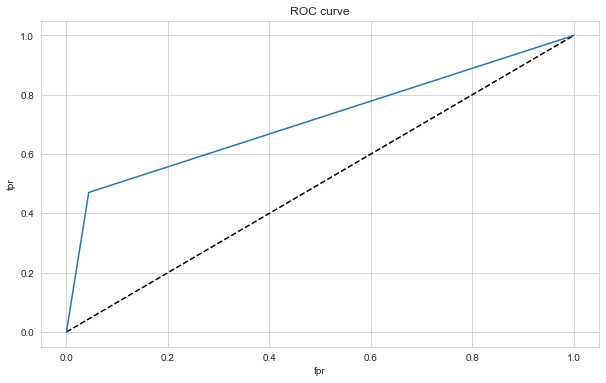

In [93]:
y_pred_proba = grid_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()


In [94]:
roc_auc_score(y_test, y_pred_proba)


0.7133091930239432

# Final Model and Model Deployment

In [114]:
import pickle
pickle.dump(scaler, open("class_churn", 'wb'))


In [115]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])


In [116]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=15, restore_best_weights=True)


In [117]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=500, verbose=1,
          callbacks=[early_stop])


Epoch 1/500
71/71 [==============================] - 1s 5ms/step - loss: 0.6123 - accuracy: 0.7123 - val_loss: 0.5020 - val_accuracy: 0.7960
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7963 - val_loss: 0.4850 - val_accuracy: 0.7960
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7963 - val_loss: 0.4726 - val_accuracy: 0.7960
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7963 - val_loss: 0.4646 - val_accuracy: 0.7960
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7963 - val_loss: 0.4559 - val_accuracy: 0.7960
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8019 - val_loss: 0.4486 - val_accuracy: 0.7960
Epoch 7/500
71/71 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8108 - val_loss: 0.4393 - val_accuracy: 0.8020
Epoch 8/500
7

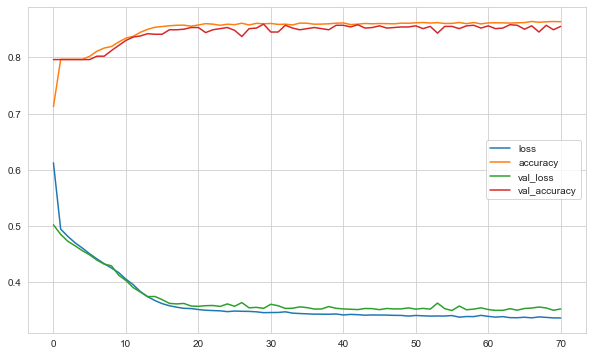

In [118]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [119]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)


loss :  0.3495931625366211
accuracy :  0.8550000190734863


In [120]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 1ms/step
[[775  21]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.79      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.85      0.83      1000



In [121]:
model.save('model_churn.h5')


## Prediction

In [130]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_churn.h5')
class_churn = pickle.load(open("class_churn", "rb"))


In [131]:
single_cust = df.drop('Exited', axis=1).iloc[0:1, :]
single_cust


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.000,1,1,1,101348.880


In [132]:
single_cust = class_churn.transform(single_cust)
single_cust


array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [133]:
(model_churn.predict(single_cust))


1/1 [==============================] - 0s 65ms/step


array([[0.32802093]], dtype=float32)

In [134]:
(model_churn.predict(single_cust) > 0.5).astype("int32")


1/1 [==============================] - 0s 29ms/step


array([[0]])

In [135]:
df["Exited"].iloc[0]


1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___